In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# Dataset Analysis

In [2]:
adult_data = pd.read_csv(r"D:\IIT\2 nd Year\2nd Sem\Machine Learning\Course Work\MachineLearningCW\Machine-Learning-Course-Work\CSV file\adult.data", header=None)

In [3]:
with open(r"D:\IIT\2 nd Year\2nd Sem\Machine Learning\Course Work\MachineLearningCW\Machine-Learning-Course-Work\CSV file\adult.test", "r") as file:
    lines = file.readlines()

lines = lines[1:]

with open(r"D:\IIT\2 nd Year\2nd Sem\Machine Learning\Course Work\MachineLearningCW\Machine-Learning-Course-Work\CSV file\adult.test", "w") as file:
    file.writelines(lines)

In [4]:
adult_test = pd.read_csv(r"D:\IIT\2 nd Year\2nd Sem\Machine Learning\Course Work\MachineLearningCW\Machine-Learning-Course-Work\CSV file\adult2.test", header=None)

In [5]:
df = pd.concat([adult_data,adult_test])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.columns = column_names
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
df.shape

(48842, 15)

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Exploratory Data Analysis

In [10]:
categorical_columns = []
for col in df.columns:
    if df[col].dtype == "O":
        categorical_columns.append(col)

In [11]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [12]:
categorical_columns.append('education-num')

In [13]:
df[categorical_columns]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,education-num
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,13
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,13
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,9
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,7
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,13
...,...,...,...,...,...,...,...,...,...,...
16276,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K.,13
16277,?,HS-grad,Widowed,?,Other-relative,Black,Male,United-States,<=50K.,9
16278,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.,13
16279,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K.,13


In [14]:
for col in categorical_columns:
    print(df[col].value_counts())
    print()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial   

In [15]:
num_cols = set(df.columns).difference(categorical_columns)

In [16]:
num_cols = list(num_cols)
num_cols

['age', 'hours-per-week', 'fnlwgt', 'capital-loss', 'capital-gain']

<Figure size 1000x3000 with 0 Axes>

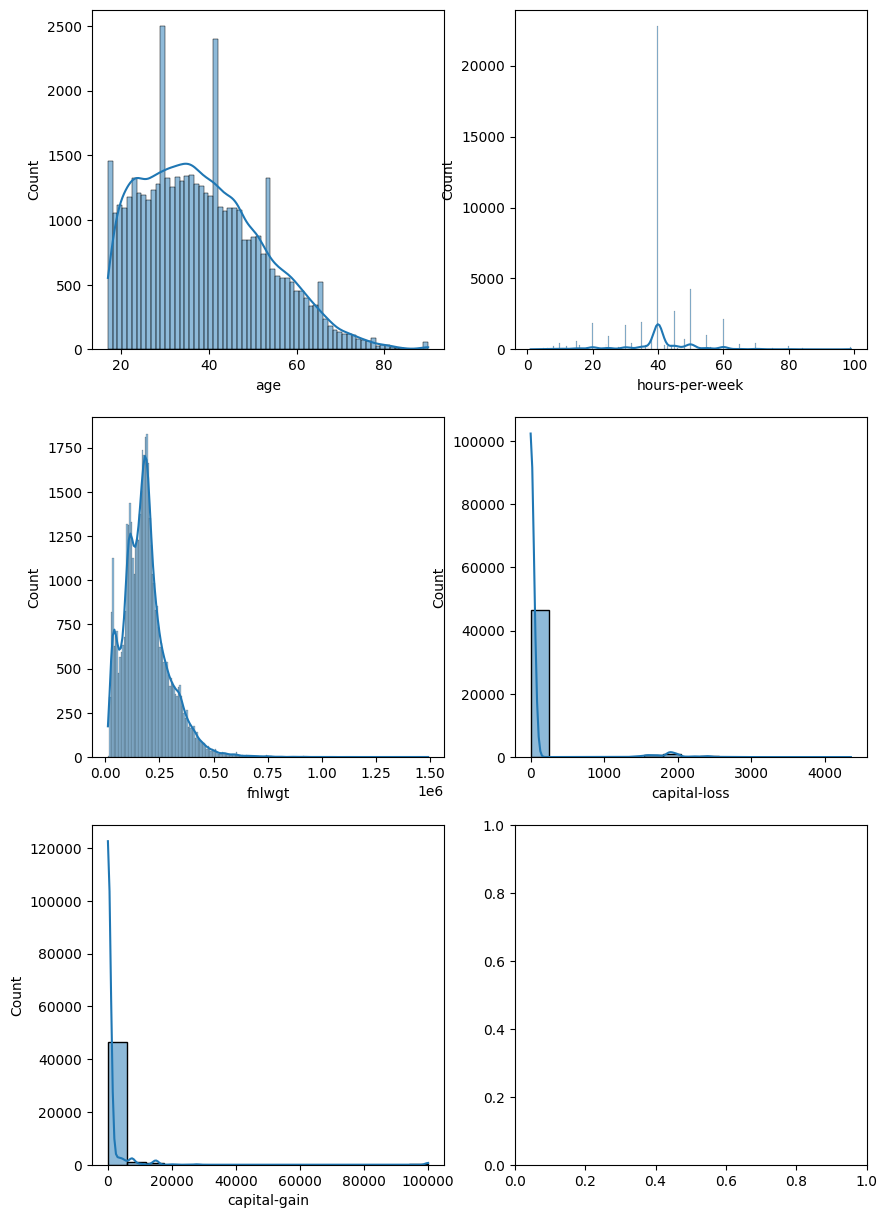

In [17]:
plt.figure(figsize=(10, 30))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])

plt.show()

# Data Cleaning

In [18]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [19]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt unique values:
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cl

In [20]:
df.isin([' ?']).sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [21]:
for col in['workclass', 'occupation', 'native-country']:
    df[col].replace(' ?', pd.NA, inplace=True)

In [22]:
df = df.dropna(subset = ['workclass', 'occupation', 'native-country'])

In [23]:
for col in['workclass', 'occupation', 'native-country']:
    print(f"(col) after remove'?':")
    print(df[col].unique())

(col) after remove'?':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
(col) after remove'?':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
(col) after remove'?':
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [24]:
df['income'].replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'}, inplace=True)

In [25]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]


workclass unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


fnlwgt unique values:
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


education-num unique values:
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


marital-status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specia

In [26]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [27]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [28]:
mean = df[df['capital-gain'] != 0]['capital-gain'].mean()

df['capital-gain'] = df['capital-gain'].replace(0, mean)

print(df['capital-gain'])
print(df['capital-gain'].unique())

0         2174.000000
1        13142.185488
2        13142.185488
3        13142.185488
4        13142.185488
             ...     
16275    13142.185488
16276    13142.185488
16278    13142.185488
16279     5455.000000
16280    13142.185488
Name: capital-gain, Length: 45222, dtype: float64
[ 2174.         13142.18548813 14084.          5178.
  5013.          2407.         14344.         15024.
  7688.          4064.          4386.          7298.
  1409.          3674.          1055.          2050.
  2176.           594.         20051.          6849.
  4101.          8614.          3411.          2597.
 25236.          4650.          2463.          3103.
 10605.          2964.          3325.          2580.
  3471.          4865.         99999.          6514.
  1471.          2329.          2105.          2885.
 10520.          2202.          2961.         27828.
  6767.          2228.          1506.         13550.
  2635.          5556.          4787.          3781.
  3137.          38

In [29]:
mean = df[df['capital-loss'] != 0]['capital-loss'].mean()

df['capital-loss'] = df['capital-loss'].replace(0, mean)

print(df['capital-loss'])
print(df['capital-loss'].unique())

0        1872.178505
1        1872.178505
2        1872.178505
3        1872.178505
4        1872.178505
            ...     
16275    1872.178505
16276    1872.178505
16278    1872.178505
16279    1872.178505
16280    1872.178505
Name: capital-loss, Length: 45222, dtype: float64
[1872.17850467 2042.         1408.         1902.         1887.
 1719.         1762.         1564.         2179.         1816.
 1980.         1977.         1876.         1340.         2206.
 1741.         1485.         2339.         2415.         1380.
 1721.         2051.         2377.         1669.         2352.
 1672.          653.         2392.         1504.         1590.
 1651.         1628.         1848.         2001.         1740.
 2002.         1579.         2258.         1602.         2547.
 2205.         1726.         2444.         1138.         2238.
  625.          213.         1539.          880.         1668.
 1092.         1594.         2231.         1844.          810.
 2824.         2559.      

In [30]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1872.178505,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13142.185488,1872.178505,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,13142.185488,1872.178505,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,13142.185488,1872.178505,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,13142.185488,1872.178505,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,13142.185488,1872.178505,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,13142.185488,1872.178505,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,13142.185488,1872.178505,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.000000,1872.178505,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.000000,1872.178505,40,United-States,>50K


In [31]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1872.178505,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13142.185488,1872.178505,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,13142.185488,1872.178505,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,13142.185488,1872.178505,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,13142.185488,1872.178505,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,13142.185488,1872.178505,40,United-States,<=50K
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,13142.185488,1872.178505,36,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,13142.185488,1872.178505,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.000000,1872.178505,40,United-States,<=50K


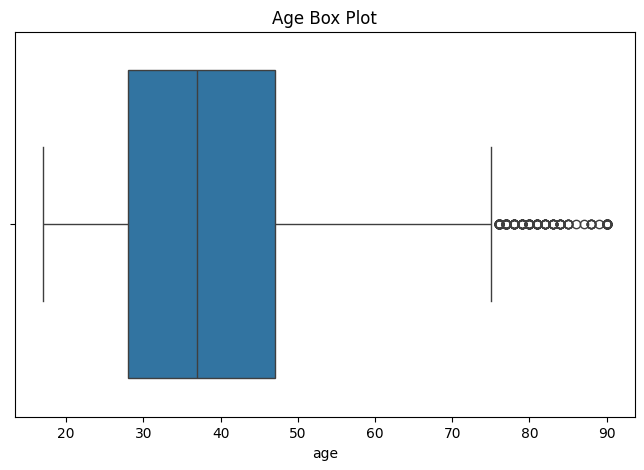

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["age"])
plt.title("Age Box Plot")
plt.show()

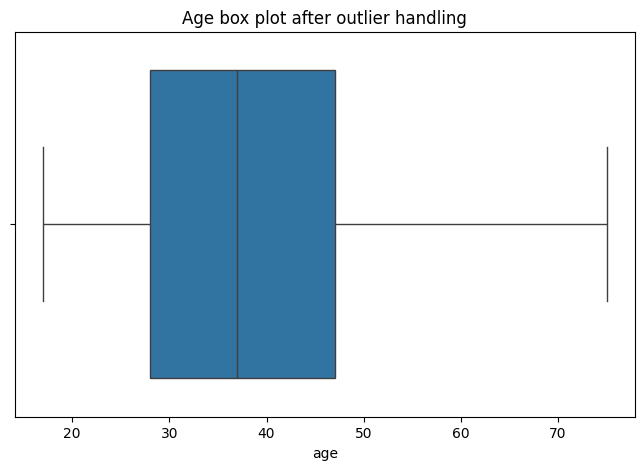

In [33]:
mean_age = df.loc[df["age"] < 75, "age"].mean()
df.loc[df["age"] > 75, "age"] = mean_age

plt.figure(figsize=(8,5))
sns.boxplot(x=df["age"])
plt.title("Age box plot after outlier handling")
plt.show()

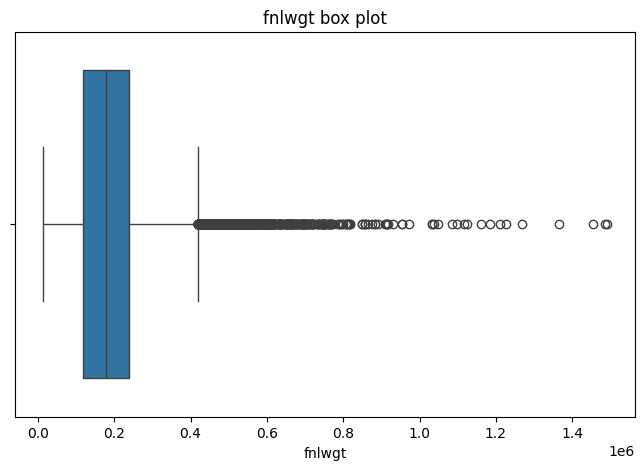

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["fnlwgt"])
plt.title("fnlwgt box plot")
plt.show()

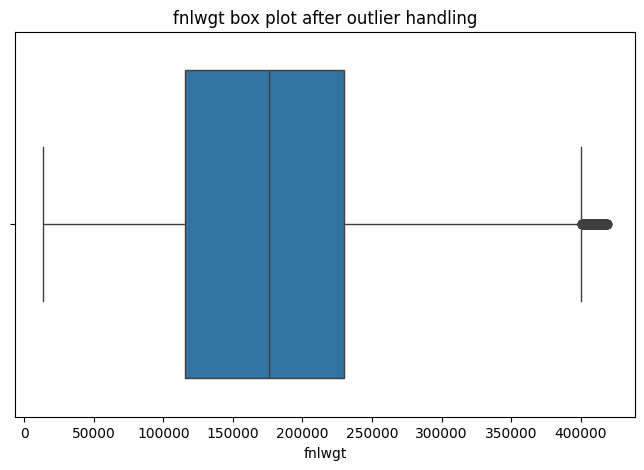

In [35]:
# Handling the outlier in Final-Weight
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df["fnlwgt"] >= lower_bound) & (df["fnlwgt"] <= upper_bound)]

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fnlwgt"])
plt.title("fnlwgt box plot after outlier handling")
plt.show()

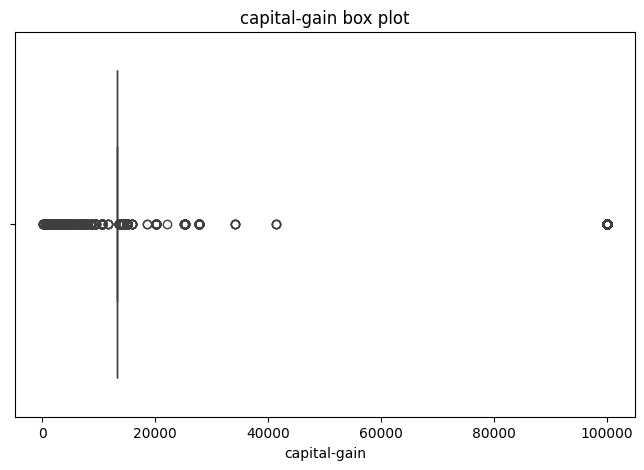

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["capital-gain"])
plt.title("capital-gain box plot")
plt.show()

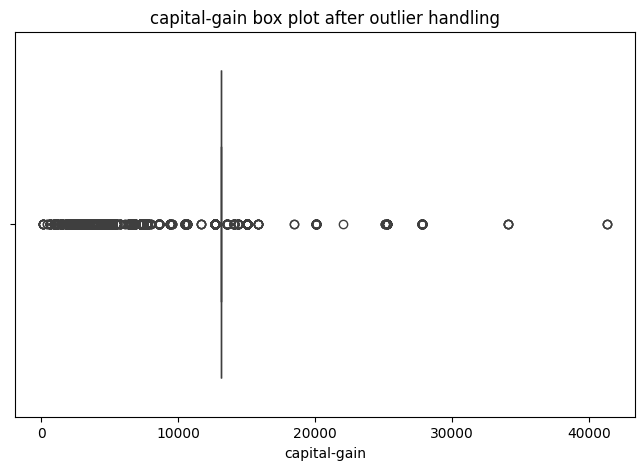

In [37]:
outlier_threshold = 60000

mean_threshold = df.loc[df["capital-gain"] <= outlier_threshold, "capital-gain"].mean()
df.loc[df["capital-gain"] > outlier_threshold, "capital-gain"] = mean_threshold

plt.figure(figsize=(8,5))
sns.boxplot(x=df["capital-gain"])
plt.title("capital-gain box plot after outlier handling")
plt.show()

In [38]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1872.178505,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13142.185488,1872.178505,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,13142.185488,1872.178505,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,13142.185488,1872.178505,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,13142.185488,1872.178505,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33.0,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,13142.185488,1872.178505,40,United-States,<=50K
16276,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,13142.185488,1872.178505,36,United-States,<=50K
16278,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,13142.185488,1872.178505,50,United-States,<=50K
16279,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.000000,1872.178505,40,United-States,<=50K


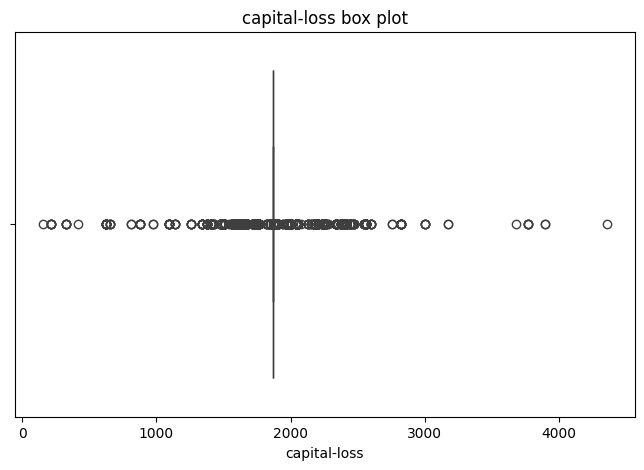

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["capital-loss"])
plt.title("capital-loss box plot")
plt.show()

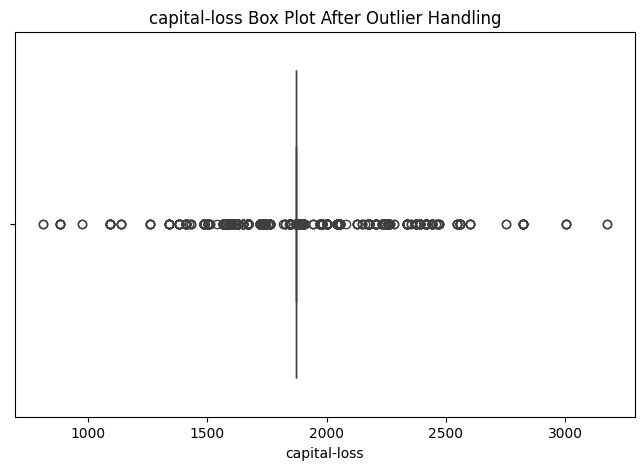

In [40]:
# Define bounds
# Define the thresholds
lower_threshold = 800
upper_threshold = 3200

# Filter out the outliers
# Calculate the mean of values within the thresholds
mean_within_threshold = df.loc[(df["capital-loss"] >= lower_threshold) & 
                                      (df["capital-loss"] <= upper_threshold), 
                                      "capital-loss"].mean()

# Replace values below the lower threshold and above the upper threshold with the calculated mean
df.loc[df["capital-loss"] < lower_threshold, "capital-loss"] = mean_within_threshold
df.loc[df["capital-loss"] > upper_threshold, "capital-loss"] = mean_within_threshold

# Create a box plot for the "capital-loss" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["capital-loss"])
plt.title("capital-loss Box Plot After Outlier Handling")
plt.show()

In [41]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1872.178505,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13142.185488,1872.178505,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,13142.185488,1872.178505,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,13142.185488,1872.178505,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,13142.185488,1872.178505,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33.0,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,13142.185488,1872.178505,40,United-States,<=50K
16276,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,13142.185488,1872.178505,36,United-States,<=50K
16278,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,13142.185488,1872.178505,50,United-States,<=50K
16279,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.000000,1872.178505,40,United-States,<=50K


In [42]:
df = df[(df["capital-loss"] < upper_bound) & (df["capital-loss"] > lower_bound)]

In [43]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1872.178505,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13142.185488,1872.178505,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,13142.185488,1872.178505,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,13142.185488,1872.178505,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,13142.185488,1872.178505,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33.0,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,13142.185488,1872.178505,40,United-States,<=50K
16276,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,13142.185488,1872.178505,36,United-States,<=50K
16278,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,13142.185488,1872.178505,50,United-States,<=50K
16279,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.000000,1872.178505,40,United-States,<=50K


In [44]:
le=LabelEncoder()
encoding_columns = ['workclass', 'education','education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

for col in encoding_columns:
    df[col] = le.fit_transform(df[col])

In [45]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,5,77516,9,12,4,0,1,4,1,2174.000000,1872.178505,40,38,0
1,50.0,4,83311,9,12,2,3,0,4,1,13142.185488,1872.178505,13,38,0
2,38.0,2,215646,11,8,0,5,1,4,1,13142.185488,1872.178505,40,38,0
3,53.0,2,234721,1,6,2,5,0,2,1,13142.185488,1872.178505,40,38,0
4,28.0,2,338409,9,12,2,9,5,2,0,13142.185488,1872.178505,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33.0,2,245211,9,12,4,9,3,4,1,13142.185488,1872.178505,40,38,0
16276,39.0,2,215419,9,12,0,9,1,4,0,13142.185488,1872.178505,36,38,0
16278,38.0,2,374983,9,12,2,9,0,4,1,13142.185488,1872.178505,50,38,0
16279,44.0,2,83891,9,12,0,0,3,1,1,5455.000000,1872.178505,40,38,0


In [46]:
# Define the directory to save the CSV file
directory = "Dataset"
# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

In [47]:
# Define the path to save the CSV file
csv_path = os.path.join(directory, "Preprocessed.csv")

# Save the encoded DataFrame to a CSV file
df.to_csv(csv_path, index=False)
print(f"CSV file saved: {csv_path}")

CSV file saved: Dataset\Preprocessed.csv


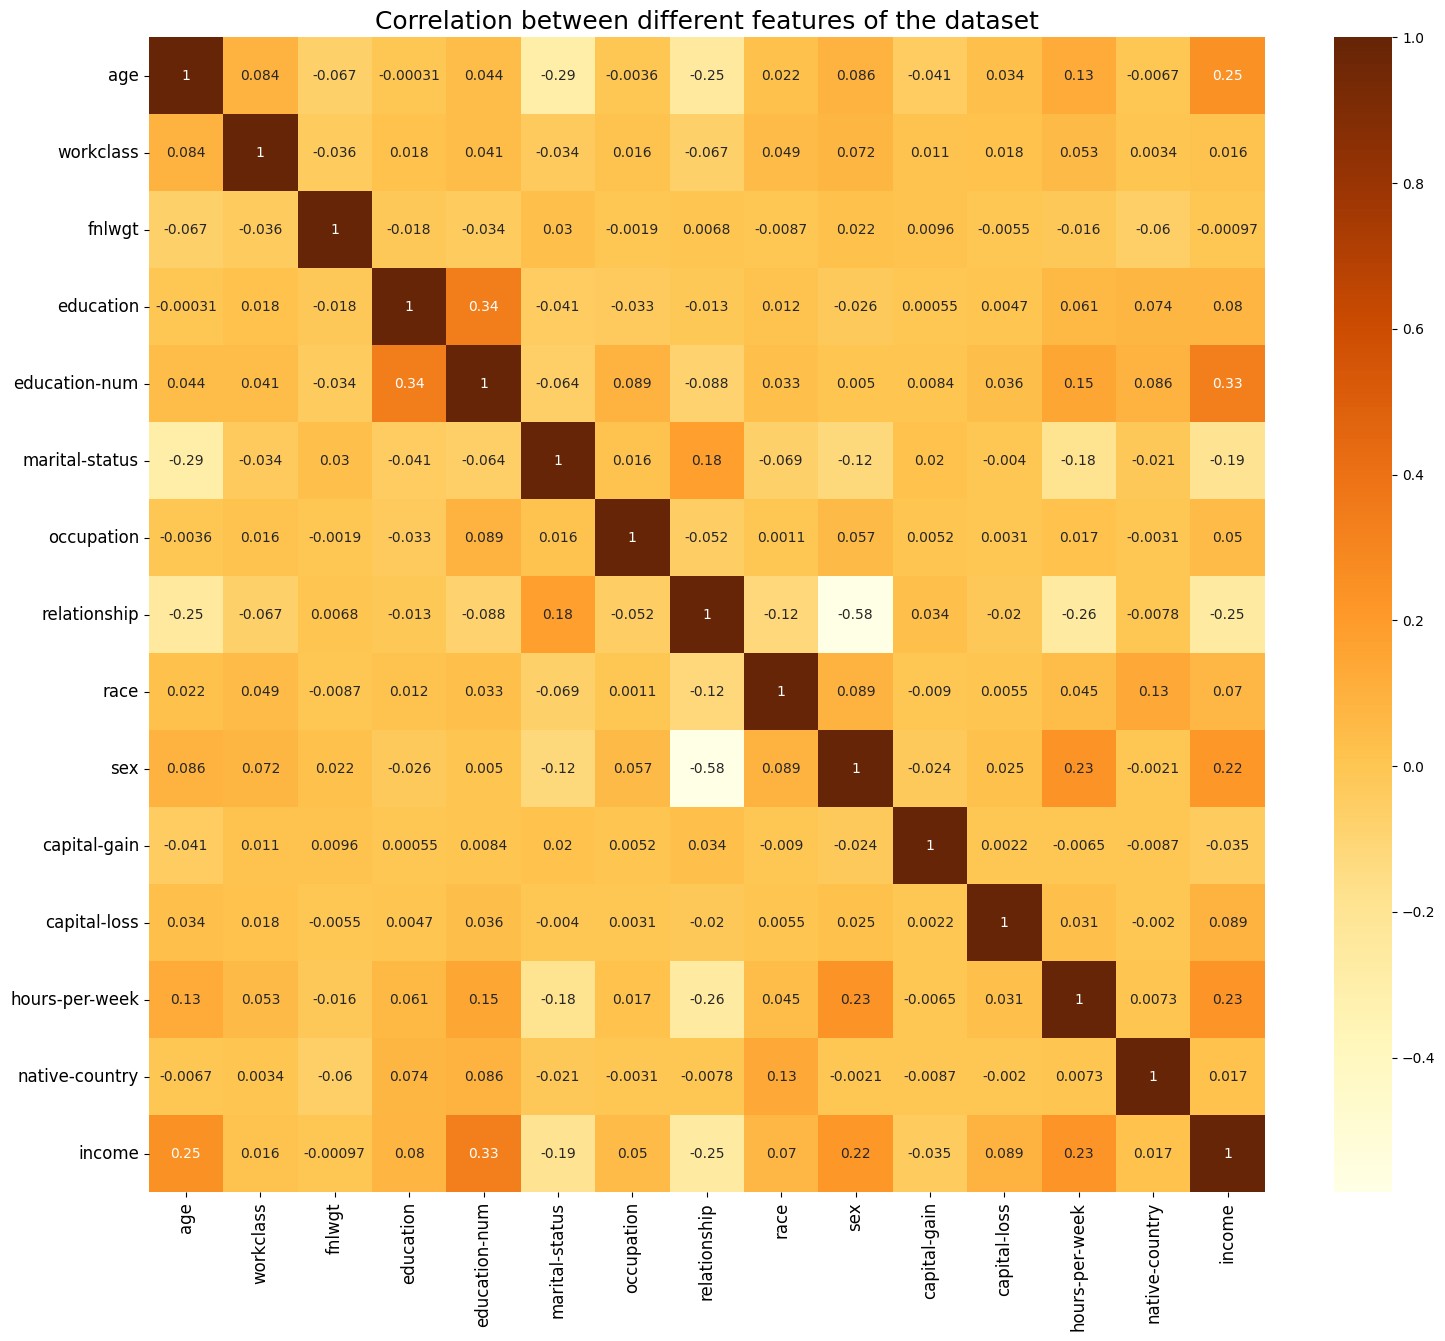

In [48]:
plt.figure(figsize=(18, 15))
plt.title("Correlation between different features of the dataset", fontsize=18)
sns.heatmap(df.corr(), cmap="YlOrBr", annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()